In [28]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Baca data dari file CSV
df = pd.read_csv('gizi.csv')

In [29]:
df.describe()

,Underweight,Stunting,Wasting
count,25.000000,25.000000,25.000000
mean,14.808000,28.468000,6.548000
std,3.280869,6.456632,2.802546
min,8.600000,14.900000,3.200000
25%,12.200000,25.500000,4.600000
50%,15.100000,28.100000,5.500000
75%,16.500000,30.800000,8.200000
max,21.900000,43.100000,13.800000


In [54]:
# Definisi variabel fuzzy
underweight = ctrl.Antecedent(np.arange(0, 26, 1), 'underweight') # 0-25%
stunting = ctrl.Antecedent(np.arange(0, 51, 1), 'stunting') # 0-50%
wasting = ctrl.Antecedent(np.arange(0, 21, 1), 'wasting') # 0-20%
status = ctrl.Consequent(np.arange(0, 101, 1), 'status') #standarnya persentase ajalah

# Fungsi keanggotaan (membership functions) input
underweight['low'] = fuzz.trimf(underweight.universe, [0, 5, 15])
underweight['medium'] = fuzz.trimf(underweight.universe, [10, 15, 20])
underweight['high'] = fuzz.trimf(underweight.universe, [15, 25, 25])

stunting['low'] = fuzz.trimf(stunting.universe, [0, 10, 25])
stunting['medium'] = fuzz.trimf(stunting.universe, [20, 30, 40])
stunting['high'] = fuzz.trimf(stunting.universe, [35, 50, 50])

wasting['low'] = fuzz.trimf(wasting.universe, [0, 2, 6])
wasting['medium'] = fuzz.trimf(wasting.universe, [4, 7, 10])
wasting['high'] = fuzz.trimf(wasting.universe, [8, 20, 20])

# Fungsi keanggotaan output
status['baik'] = fuzz.trimf(status.universe, [0, 0, 40])
status['perlu_perhatian'] = fuzz.trimf(status.universe, [30, 50, 70])
status['buruk'] = fuzz.trimf(status.universe, [60, 100, 100])

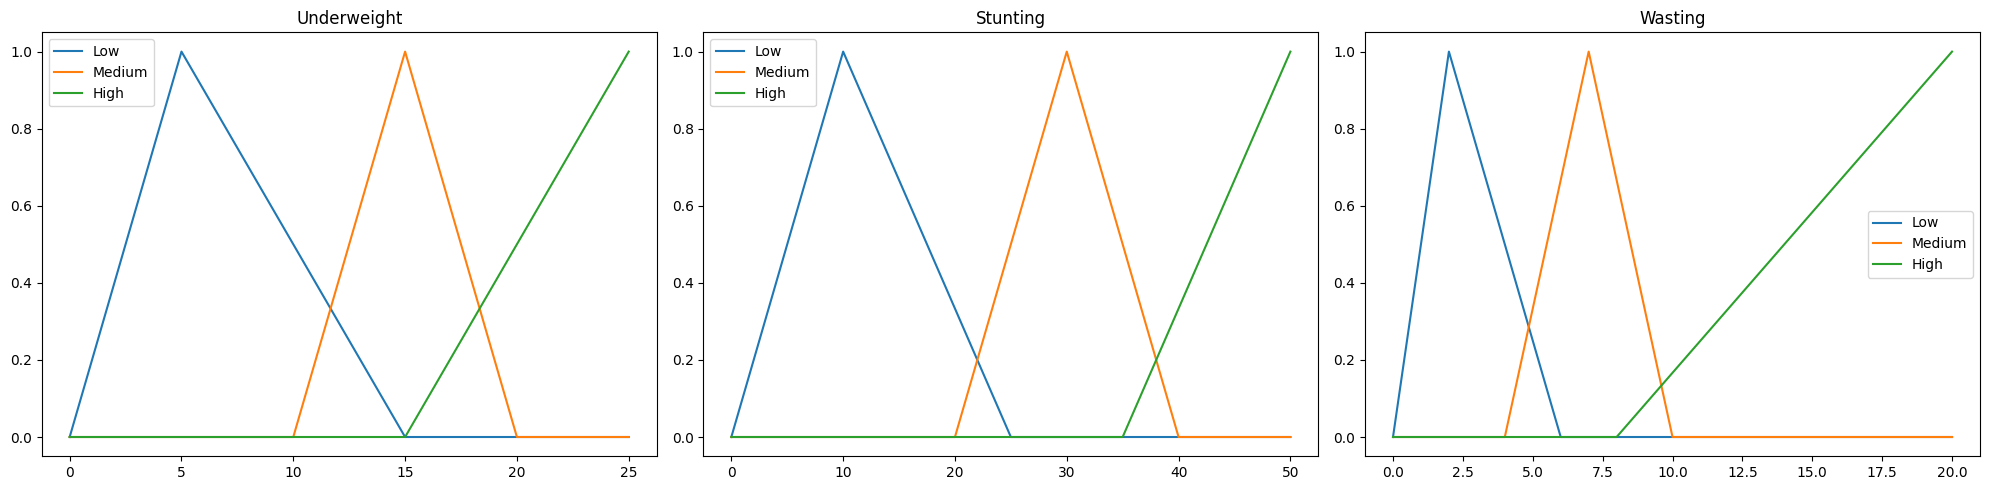

In [55]:
import matplotlib.pyplot as plt

# Buat figure dengan 1 baris 3 kolom
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

# Plot manual untuk underweight
axes[0].plot(underweight.universe, underweight['low'].mf, label='Low')
axes[0].plot(underweight.universe, underweight['medium'].mf, label='Medium')
axes[0].plot(underweight.universe, underweight['high'].mf, label='High')
axes[0].set_title('Underweight')
axes[0].legend()

# Plot manual untuk stunting
axes[1].plot(stunting.universe, stunting['low'].mf, label='Low')
axes[1].plot(stunting.universe, stunting['medium'].mf, label='Medium')
axes[1].plot(stunting.universe, stunting['high'].mf, label='High')
axes[1].set_title('Stunting')
axes[1].legend()

# Plot manual untuk wasting
axes[2].plot(wasting.universe, wasting['low'].mf, label='Low')
axes[2].plot(wasting.universe, wasting['medium'].mf, label='Medium')
axes[2].plot(wasting.universe, wasting['high'].mf, label='High')
axes[2].set_title('Wasting')
axes[2].legend()

plt.tight_layout()
plt.show()


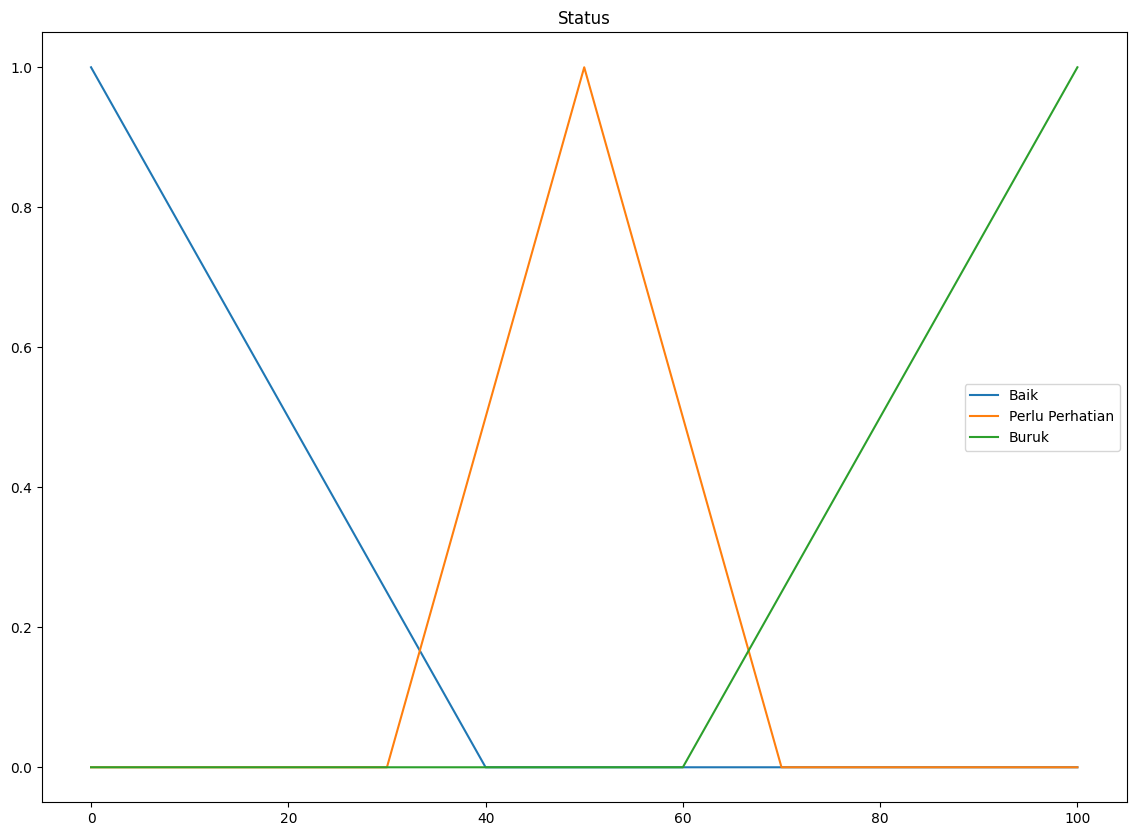

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14, 10))

# Plot status
axes.plot(status.universe, status['baik'].mf, label='Baik')
axes.plot(status.universe, status['perlu_perhatian'].mf, label='Perlu Perhatian')
axes.plot(status.universe, status['buruk'].mf, label='Buruk')
axes.set_title('Status')
axes.legend()

In [57]:
rules = [
    # baris 1
    ctrl.Rule(underweight['low'] & stunting['low'] & wasting['low'], status['baik']),
    
    # baris 2-3
    ctrl.Rule(underweight['low'] & stunting['low'] & wasting['medium'], status['perlu_perhatian']),
    ctrl.Rule(underweight['low'] & stunting['low'] & wasting['high'], status['buruk']),
    
    # baris 4-6
    ctrl.Rule(underweight['low'] & stunting['medium'] & wasting['low'], status['perlu_perhatian']),
    ctrl.Rule(underweight['low'] & stunting['medium'] & wasting['medium'], status['perlu_perhatian']),
    ctrl.Rule(underweight['low'] & stunting['medium'] & wasting['high'], status['buruk']),
    
    # baris 7-9
    ctrl.Rule(underweight['low'] & stunting['high'] & wasting['low'], status['buruk']),
    ctrl.Rule(underweight['low'] & stunting['high'] & wasting['medium'], status['buruk']),
    ctrl.Rule(underweight['low'] & stunting['high'] & wasting['high'], status['buruk']),
    
    # baris 10-12
    ctrl.Rule(underweight['medium'] & stunting['low'] & wasting['low'], status['perlu_perhatian']),
    ctrl.Rule(underweight['medium'] & stunting['low'] & wasting['medium'], status['perlu_perhatian']),
    ctrl.Rule(underweight['medium'] & stunting['low'] & wasting['high'], status['buruk']),
    
    # baris 13-15
    ctrl.Rule(underweight['medium'] & stunting['medium'] & wasting['low'], status['perlu_perhatian']),
    ctrl.Rule(underweight['medium'] & stunting['medium'] & wasting['medium'], status['perlu_perhatian']),
    ctrl.Rule(underweight['medium'] & stunting['medium'] & wasting['high'], status['buruk']),
    
    # baris 16-18
    ctrl.Rule(underweight['medium'] & stunting['high'] & wasting['low'], status['buruk']),
    ctrl.Rule(underweight['medium'] & stunting['high'] & wasting['medium'], status['buruk']),
    ctrl.Rule(underweight['medium'] & stunting['high'] & wasting['high'], status['buruk']),
    
    # baris 19-21
    ctrl.Rule(underweight['high'] & stunting['low'] & wasting['low'], status['buruk']),
    ctrl.Rule(underweight['high'] & stunting['low'] & wasting['medium'], status['buruk']),
    ctrl.Rule(underweight['high'] & stunting['low'] & wasting['high'], status['buruk']),
    
    # baris 22-24
    ctrl.Rule(underweight['high'] & stunting['medium'] & wasting['low'], status['buruk']),
    ctrl.Rule(underweight['high'] & stunting['medium'] & wasting['medium'], status['buruk']),
    ctrl.Rule(underweight['high'] & stunting['medium'] & wasting['high'], status['buruk']),
    
    # baris 25-27
    ctrl.Rule(underweight['high'] & stunting['high'] & wasting['low'], status['buruk']),
    ctrl.Rule(underweight['high'] & stunting['high'] & wasting['medium'], status['buruk']),
    ctrl.Rule(underweight['high'] & stunting['high'] & wasting['high'], status['buruk']),
]


In [58]:
# Bangun sistem kontrol
status_ctrl = ctrl.ControlSystem(rules)
status_sim = ctrl.ControlSystemSimulation(status_ctrl)

# Evaluasi setiap baris data
hasil_status = []
for i in range(len(df)):
    status_sim.input['underweight'] = df['Underweight'][i]
    status_sim.input['stunting'] = df['Stunting'][i]
    status_sim.input['wasting'] = df['Wasting'][i]
    status_sim.compute()
    score = status_sim.output['status']
    if score < 40:
        hasil_status.append('Baik')
    elif score < 70:
        hasil_status.append('Perlu Perhatian')
    else:
        hasil_status.append('Buruk')

# Tambahkan hasil ke DataFrame
df['Status Gizi Wilayah'] = hasil_status

# Tampilkan hasil
print(df[['Kabupaten/Kota', 'Underweight', 'Stunting', 'Wasting', 'Status Gizi Wilayah']])

# simpan
df.to_csv('hasil_status_gizi.csv', index=False)

   Kabupaten/Kota  Underweight  Stunting  Wasting Status Gizi Wilayah
0           Bogor         15.2      28.5      4.6     Perlu Perhatian
1        Sukabumi         14.8      37.6      4.4     Perlu Perhatian
2         Cianjur         15.2      35.7      3.2     Perlu Perhatian
3         Bandung         18.6      38.7      4.6               Buruk
4           Garut         15.7      43.1      4.0               Buruk
5     Tasikmalaya         14.3      33.4      4.8     Perlu Perhatian
6          Ciamis         13.8      29.0      5.5     Perlu Perhatian
7        Kuningan         11.6      28.5      5.5     Perlu Perhatian
8         Cirebon         19.6      25.6     13.8               Buruk
9      Majalengka         16.4      30.2      7.7     Perlu Perhatian
10       Sumedang         13.1      28.1      5.0     Perlu Perhatian
11      Indramayu         18.4      29.9      9.0     Perlu Perhatian
12         Subang         15.1      25.5      8.3     Perlu Perhatian
13     Purwakarta   